In [36]:
#import dependiencies
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
import matplotlib.pyplot as plt

In [3]:
file_path1 = 'new_refined_data.csv'
file_path2 = 'Lab_Session_Data.xlsx'
data1 = pd.read_csv(file_path1)
data2 = pd.read_excel(file_path2,sheet_name='Purchase data')
data2

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Candy,Mango,Milk
0,C_1,20,6,2,386,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,55.0,18.0
1,C_2,16,3,6,289,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C_3,27,6,2,393,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C_4,19,1,2,110,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C_5,24,4,2,280,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,C_6,22,1,5,167,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,C_7,15,4,2,271,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,C_8,18,4,2,274,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,C_9,21,1,4,148,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,C_10,16,2,4,198,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#A1

In [66]:

neigh = KNeighborsClassifier()
X = data1.iloc[:,1:-1]
y = data1['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y) # stratify ensures class balance

neigh.fit(X_train,y_train)
y_obt = neigh.predict(X_test)
tp,tn,fp,fn = 0,0,0,0
y_test = list(y_test)
y_obt = list(y_obt)
for i in range(len(y_test)):
    if y_test[i] == 'Non-Fact' and y_obt[i] == 'Non-Fact':
        tn += 1
    elif y_test[i] == 'Fact' and y_obt[i] == 'Non-Fact':
        fn += 1
    elif y_test[i] == 'Non-Fact' and y_obt[i] == 'Fact':
        fp += 1
    else:
        tp += 1

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
print('Acurracy :',Accuracy*100)
print('Precision :',precision*100)
print('Recall :',recall*100)


Acurracy : 80.23255813953489
Precision : 80.76923076923077
Recall : 63.63636363636363


In [ ]:
#A2

In [41]:

def mse(y_true, y_pred):
    """Calculates Mean Squared Error (MSE) manually."""
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    # The formula is MSE = sum((y_true - y_pred)^2) / n
    mse = np.mean(np.square(y_true - y_pred))
    return mse

def rmse(y_true, y_pred):
    """Calculates Root Mean Squared Error (RMSE) manually."""
    # RMSE is the square root of MSE
    mse = mean_squared_error_py(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

def mape(y_true, y_pred):
    """Calculates Mean Absolute Percentage Error (MAPE) manually."""
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    # The formula is MAPE = (1/n) * sum(|(y_true - y_pred) / y_true|) * 100
    # np.abs() calculates the absolute values, np.mean() calculates the average
    # A small epsilon is added to the denominator to avoid division by zero
    epsilon = 1e-10
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100
    return mape

def r2(y_true, y_pred):
    """Calculates R-squared (R2) score manually."""
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    # Total sum of squares (TSS)
    tss = np.sum(np.square(y_true - np.mean(y_true)))
    # Residual sum of squares (RSS)
    rss = np.sum(np.square(y_true - y_pred))
    # The formula is R2 = 1 - (RSS / TSS)
    r2 = 1 - (rss / tss)
    return r2

actual = [1,55,18]
predicted = [0.99,54.99,18]

print(f"Actual values: {actual}")
print(f"Predicted values: {predicted}\n")

print(f"MSE: {mse(actual, predicted):.4f}")
print(f"RMSE: {rmse(actual, predicted):.4f}")
print(f"MAPE: {mape(actual, predicted):.4f}%")
print(f"R2 Score: {r2(actual, predicted):.4f}")



Actual values: [1, 55, 18]
Predicted values: [0.99, 54.99, 18]

MSE: 0.0001
RMSE: 0.0082
MAPE: 0.3394%
R2 Score: 1.0000


In [ ]:
#A3

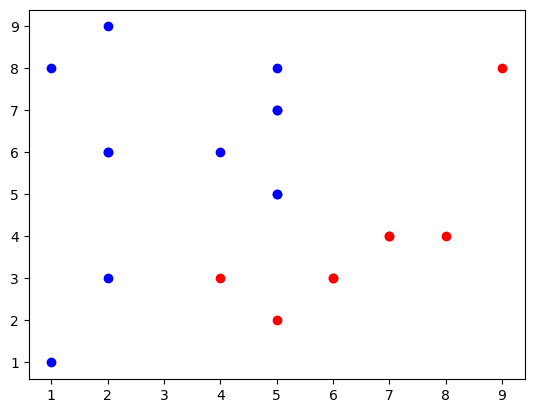

In [32]:
rnd = np.random.default_rng(seed=12)
X = np.random.randint(1,10,size=(2,20))
y = [1 if X[1][i]//X[0][i] <= 0 else 0 for i in range(20)]

blue,red = [[],[]],[[],[]]
for i in range(20):
    if y[i]==0:
        blue[0].append(X[0][i])
        blue[1].append(X[1][i])
    else:
        red[0].append(X[0][i])
        red[1].append(X[1][i])
plt.scatter(blue[0],blue[1],c='b')
plt.scatter(red[0],red[1],c='r')

In [ ]:
#A4

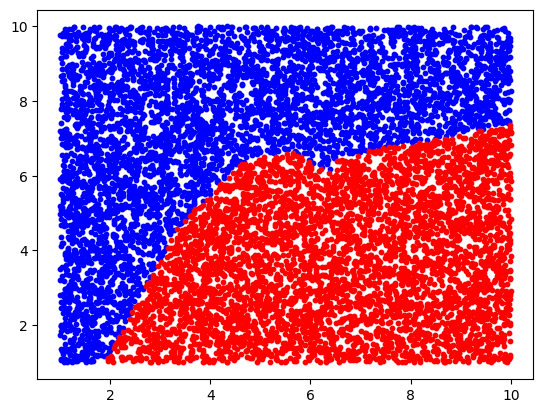

In [7]:
xtest = np.random.uniform(low=1.0, high=10.0, size=(10000,2))
red_test_x,red_test_y = [],[]
blue_test_x,blue_test_y = [],[]
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X.T,y)
ytest = classifier.predict(xtest)
plt.scatter(xtest[ytest==0,0],xtest[ytest==0,1],c='blue',s=10)
plt.scatter(xtest[ytest==1,0],xtest[ytest==1,1],c='red',s=10)

In [ ]:
#A5

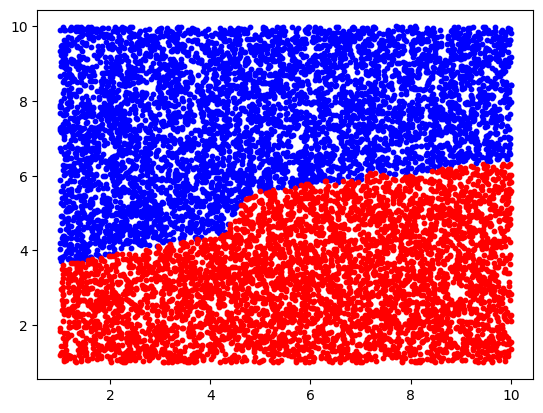

In [95]:
xtest = np.random.uniform(low=1.0, high=10.0, size=(10000,2))
red_test_x,red_test_y = [],[]
blue_test_x,blue_test_y = [],[]
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X.T,y)
ytest = classifier.predict(xtest)
plt.scatter(xtest[ytest==0,0],xtest[ytest==0,1],c='blue',s=10)
plt.scatter(xtest[ytest==1,0],xtest[ytest==1,1],c='red',s=10)

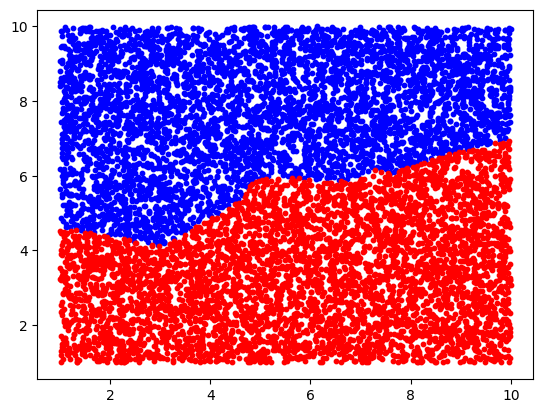

In [96]:
xtest = np.random.uniform(low=1.0, high=10.0, size=(10000,2))
red_test_x,red_test_y = [],[]
blue_test_x,blue_test_y = [],[]
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X.T,y)
ytest = classifier.predict(xtest)
plt.scatter(xtest[ytest==0,0],xtest[ytest==0,1],c='blue',s=10)
plt.scatter(xtest[ytest==1,0],xtest[ytest==1,1],c='red',s=10)

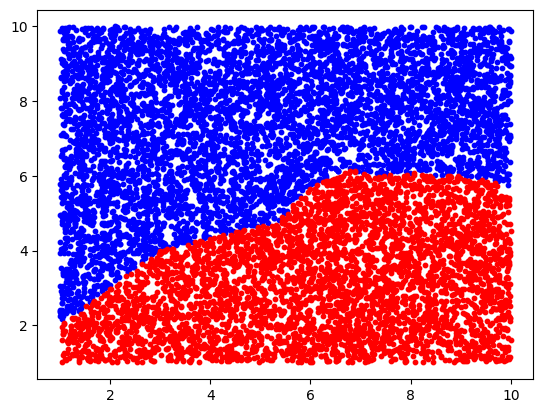

In [97]:
xtest = np.random.uniform(low=1.0, high=10.0, size=(10000,2))
red_test_x,red_test_y = [],[]
blue_test_x,blue_test_y = [],[]
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X.T,y)
ytest = classifier.predict(xtest)
plt.scatter(xtest[ytest==0,0],xtest[ytest==0,1],c='blue',s=10)
plt.scatter(xtest[ytest==1,0],xtest[ytest==1,1],c='red',s=10)

In [ ]:
#A7

In [39]:
#Randomised Search CV
knn = KNeighborsClassifier()
param_grid = {
    "n_neighbors": [1, 3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}
random_search = RandomizedSearchCV(knn,param_grid)
random_search.fit(X.T,y)
print(f'Random search best parameters are {random_search.best_params_}')
#GridSearchCV
clf = GridSearchCV(knn,param_grid)
clf.fit(X.T,y)
print(f'Grid search best parameters are {clf.best_params_}')

Random search best parameters are {'weights': 'uniform', 'n_neighbors': 5, 'metric': 'euclidean'}
Grid search best parameters are {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}


In [ ]:
#A6

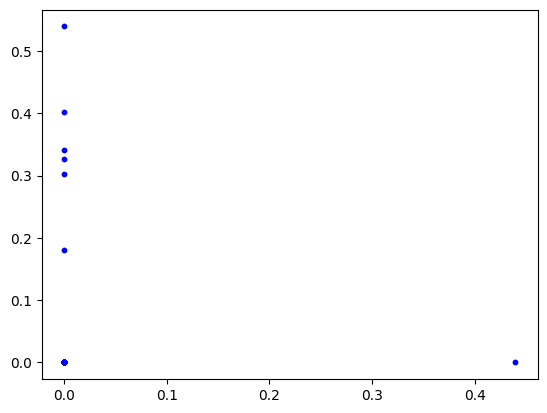

In [58]:
X_data = data1.iloc[:,1:3]
y_data = data1['Label']
classifier = KNeighborsClassifier(n_neighbors = 3)
#new_knn = KNeighborsClassifier(n_neighbors=3)
#x_tra,x_test,y_tra,y_test = train_test_split(X_data,y_data)
#new_knn.fit(x_tra,y_tra)

#y_pre = new_knn.predict(x_test)
classifier.fit(X_data,y_data)
y = classifier.predict(X_data)
#X_data = list(X_data)
#y = list(y)
plt.scatter(X_data['07'],X_data['10'],c='blue',s=10)
